<a href="https://colab.research.google.com/github/LTPDat/AI/blob/main/W3_FuzzyLogic_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#--------------------------------------------Adaptive Food Suggestion Engine by Fuzzy Logic#--------------------------------------------#

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [ ]:
#Khai báo các biến in/out
taste = ctrl.Antecedent(np.arange(0,10.1,0.1), 'taste')
environment = ctrl.Antecedent(np.arange(0,10.1,0.1), 'environment')
budget = ctrl.Antecedent(np.arange(0,10001,1), 'budget')
location = ctrl.Antecedent(np.arange(0,20.1,0.1), 'location')
user_review = ctrl.Antecedent(np.arange(0,5.1,0.1), 'user_review')
preference = ctrl.Consequent(np.arange(0,9.1,0.1), 'preference')

In [ ]:
#Các hàm liên thuộc
taste['Low']=fuzz.gaussmf(taste.universe,0,2)
taste['Medium']=fuzz.gaussmf(taste.universe,6,1.5)
taste['High']=fuzz.gaussmf(taste.universe,10,0.5)
#taste.view()

environment['Low']=fuzz.gaussmf(environment.universe,0,2)
environment['Medium']=fuzz.gaussmf(environment.universe,5,2)
environment['High']=fuzz.gaussmf(environment.universe,10,3)
#environment.view()

budget['Low']=fuzz.gaussmf(budget.universe,0,2000)
budget['Medium']=fuzz.gaussmf(budget.universe,4000,2000)
budget['High']=fuzz.gaussmf(budget.universe,10000,2000)
#budget.view()

location['Low']=fuzz.gaussmf(location.universe,0,3)
location['Medium']=fuzz.gaussmf(location.universe,10,2)
location['High']=fuzz.gaussmf(location.universe,20,6)
#location.view()

user_review['Low']=fuzz.gaussmf(user_review.universe,0,0.8)
user_review['Medium']=fuzz.gaussmf(user_review.universe,3,0.6)
user_review['High']=fuzz.gaussmf(user_review.universe,5,0.2)
#user_review.view()

preference['Lv1'] = fuzz.trimf(preference.universe, [0,1.5,3])
preference['Lv2'] = fuzz.trimf(preference.universe, [1.5,3,4.5])
preference['Lv3'] = fuzz.trimf(preference.universe, [3,4.5,6])
preference['Lv4'] = fuzz.trimf(preference.universe, [4.5,6,7.5])
preference['Lv5'] = fuzz.trimf(preference.universe, [6,7.5,9])
#preference.view()

In [ ]:
#Tạo luật
rule = []

#Học các rule
index = ['Low', 'Medium', 'High']
level = ['Lv1','Lv2','Lv3','Lv4','Lv5']
count=0
for a in index:
  for b in index:
    for c in index:
      for d in index:
        for e in index:
          rule.append(ctrl.Rule(taste[a]&environment[b]&budget[c]&location[d]&user_review[e], preference[level[count]]))
          if (a=='Low') and (b=='Low') and (c=='Medium'):
            count=1
          if (a=='Low') and (b=='Medium') and (c=='Medium'):
            count=2
          if (a=='Medium') and (b=='High') and (c=='Medium'):
            count=3
          if (a=='High') and (b=='High') and (c=='Medium'):
            count=4
#Học các rule
preference_control = ctrl.ControlSystem(rule[:])

6.27516490915389


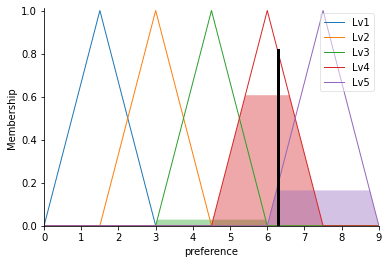

In [ ]:
#Simulation
preference_simulation = ctrl.ControlSystemSimulation(preference_control)
preference_simulation.input['taste'] = 10
preference_simulation.input['environment'] = 10
preference_simulation.input['budget'] = 200
preference_simulation.input['location'] = 3
preference_simulation.input['user_review'] = 5
preference_simulation.compute()
print(preference_simulation.output['preference'])
preference.view(sim=preference_simulation)

In [ ]:
#-----------------------------------------------------------------------------------------------------------------------------------------#
#-----------------------------------------------------------------------------------------------------------------------------------------#
#-----------------------------------------------------------------------------------------------------------------------------------------#
#-----------Fuzzy logic–based clinical decision support system for the evaluation of renal function in post‐Transplant Patients-----------#
#-----------------------------------------------------------------------------------------------------------------------------------------#
#-----------------------------------------------------------------------------------------------------------------------------------------#
#-----------------------------------------------------------------------------------------------------------------------------------------#

In [ ]:
#Khai báo in/out
glycaemia = ctrl.Antecedent(np.arange(70,150,0.1),'glycaemia')
sirolimus = ctrl.Antecedent(np.arange(0,20.1,0.1),'sirolimus')
proteinuria = ctrl.Consequent(np.arange(150,4000,1),'proteinuria')

In [ ]:
#Các hàm liên thuộc
glycaemia['good']=fuzz.trimf(glycaemia.universe, [70,70,100])
glycaemia['alarm']=fuzz.trimf(glycaemia.universe, [70,100,126])
glycaemia['danger']=fuzz.trimf(glycaemia.universe, [126,150,150])
#glycaemia.view()

sirolimus['alarm_down']=fuzz.trimf(sirolimus.universe, [0,0,5])
sirolimus['sufficient']=fuzz.trimf(sirolimus.universe, [0,4,7])
sirolimus['good']=fuzz.trimf(sirolimus.universe, [6,7,12])
sirolimus['alarm_up']=fuzz.trimf(sirolimus.universe, [11,12,14])
sirolimus['danger']=fuzz.trimf(sirolimus.universe, [13,14,20])
#sirolimus.view()

proteinuria['good']=fuzz.trimf(proteinuria.universe, [0,0,150])
proteinuria['sufficient']=fuzz.trimf(proteinuria.universe, [0,150,500])
proteinuria['alterate']=fuzz.trimf(proteinuria.universe, [150,500,1000])
proteinuria['alarm']=fuzz.trimf(proteinuria.universe, [500,1000,3000])
proteinuria['danger']=fuzz.trimf(proteinuria.universe, [1000,3000,4000])
#proteinuria.view()

In [ ]:
#Tạo luật
rule1 = ctrl.Rule(glycaemia['good']&sirolimus['good'], proteinuria['good'])
rule2 = ctrl.Rule(glycaemia['danger']&sirolimus['danger'], proteinuria['danger'])
rule3 = ctrl.Rule(glycaemia['good']&sirolimus['sufficient'], proteinuria['sufficient'])
rule4 = ctrl.Rule(glycaemia['alarm']&sirolimus['alarm_up'], proteinuria['alarm'])
rule5 = ctrl.Rule(glycaemia['alarm']&sirolimus['sufficient'], proteinuria['alterate'])
rule6 = ctrl.Rule(glycaemia['good']&sirolimus['alarm_up'], proteinuria['alterate'])
rule7 = ctrl.Rule(glycaemia['alarm']&sirolimus['good'], proteinuria['sufficient'])
rule8 = ctrl.Rule(glycaemia['good']&sirolimus['alarm_down'], proteinuria['sufficient'])

#Học các rule
proteinuria_control = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8])

276.388888888889


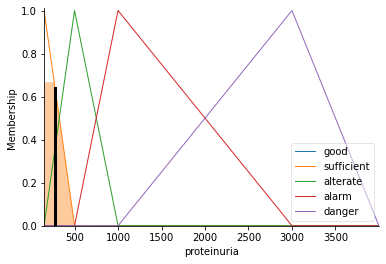

In [ ]:
#Simulation
proteinuria_simulation = ctrl.ControlSystemSimulation(proteinuria_control)
proteinuria_simulation.input['glycaemia'] = 90
proteinuria_simulation.input['sirolimus'] = 7.82
proteinuria_simulation.compute()
print(proteinuria_simulation.output['proteinuria'])
proteinuria.view(sim=proteinuria_simulation)

In [ ]:
#-----------------------------------------------------------------------------------------------------------------------------------------#
#-----------------------------------------------------------------------------------------------------------------------------------------#
#-----------------------------------------------------------------------------------------------------------------------------------------#
#--------------------------------------------Prediction of rainfall using fuzzy logic-----------------------------------------------------#
#-----------------------------------------------------------------------------------------------------------------------------------------#
#-----------------------------------------------------------------------------------------------------------------------------------------#
#-----------------------------------------------------------------------------------------------------------------------------------------#

In [ ]:
#Khai báo in/out
windSpeed = ctrl.Antecedent(np.arange(0.7,3.2,0.05), 'windSpeed')
temp = ctrl.Antecedent(np.arange(20.4,41.2,0.1), 'temp')
rainfall = ctrl.Consequent(np.arange(0.2,9.2,0.1), 'rainfall')

In [ ]:
#Các hàm liên thuộc
windSpeed['very_low'] = fuzz.trimf(windSpeed.universe, [0,0,0.7])
windSpeed['low'] = fuzz.trimf(windSpeed.universe, [0,0.7,1.2])
windSpeed['normal'] = fuzz.trimf(windSpeed.universe, [0.7,1.2,2.0])
windSpeed['high'] = fuzz.trimf(windSpeed.universe, [1.2,2,2.5])
windSpeed['very_high'] = fuzz.trimf(windSpeed.universe, [2,2.5,3.2])

temp['very_low'] = fuzz.trimf(temp.universe, [20.4,20.4,25])
temp['low'] = fuzz.trimf(temp.universe, [20.4,25,30])
temp['normal'] = fuzz.trimf(temp.universe, [25,30,33])
temp['high'] = fuzz.trimf(temp.universe, [30,33,37])
temp['very_high'] = fuzz.trimf(temp.universe, [33,37,41.2])

rainfall['very_low'] = fuzz.trimf(rainfall.universe, [0.2,0.2,3])
rainfall['low'] = fuzz.trimf(rainfall.universe, [0.2,2,4])
rainfall['normal'] = fuzz.trimf(rainfall.universe, [2,4,6])
rainfall['high'] = fuzz.trimf(rainfall.universe, [4,6,8])
rainfall['very_high'] = fuzz.trimf(rainfall.universe, [6,8,9.1])

In [ ]:
#Tạo luật
rule1 = ctrl.Rule(windSpeed['very_low']&temp['very_low'], rainfall['very_low'])
rule2 = ctrl.Rule(windSpeed['very_low']&temp['low'], rainfall['very_low'])
rule3 = ctrl.Rule(windSpeed['very_low']&temp['normal'], rainfall['low'])
rule4 = ctrl.Rule(windSpeed['very_low']&temp['high'], rainfall['low'])
rule5 = ctrl.Rule(windSpeed['very_low']&temp['very_high'], rainfall['low'])

rule6 = ctrl.Rule(windSpeed['low']&temp['very_low'], rainfall['low'])
rule7 = ctrl.Rule(windSpeed['low']&temp['low'], rainfall['low'])
rule8 = ctrl.Rule(windSpeed['low']&temp['normal'], rainfall['low'])
rule9 = ctrl.Rule(windSpeed['low']&temp['high'], rainfall['low'])
rule10 = ctrl.Rule(windSpeed['low']&temp['very_high'], rainfall['normal'])

rule11 = ctrl.Rule(windSpeed['normal']&temp['very_low'], rainfall['low'])
rule12 = ctrl.Rule(windSpeed['normal']&temp['low'], rainfall['low'])
rule13 = ctrl.Rule(windSpeed['normal']&temp['normal'], rainfall['normal'])
rule14 = ctrl.Rule(windSpeed['normal']&temp['high'], rainfall['normal'])
rule15 = ctrl.Rule(windSpeed['normal']&temp['very_high'], rainfall['normal'])

rule16 = ctrl.Rule(windSpeed['high']&temp['very_low'], rainfall['low'])
rule17 = ctrl.Rule(windSpeed['high']&temp['low'], rainfall['low'])
rule18 = ctrl.Rule(windSpeed['high']&temp['normal'], rainfall['normal'])
rule19 = ctrl.Rule(windSpeed['high']&temp['high'], rainfall['normal'])
rule20 = ctrl.Rule(windSpeed['high']&temp['very_high'], rainfall['high'])

rule21 = ctrl.Rule(windSpeed['very_high']&temp['very_low'], rainfall['low'])
rule22 = ctrl.Rule(windSpeed['very_high']&temp['low'], rainfall['normal'])
rule23 = ctrl.Rule(windSpeed['very_high']&temp['normal'], rainfall['normal'])
rule24 = ctrl.Rule(windSpeed['very_high']&temp['high'], rainfall['high'])
rule25 = ctrl.Rule(windSpeed['very_high']&temp['very_high'], rainfall['very_high'])

#Học các rule
rainfall_control = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])

4.000000000000003


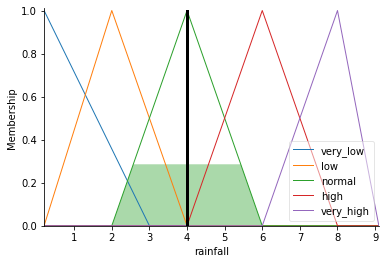

In [ ]:
#Simulation
rainfall_simulation = ctrl.ControlSystemSimulation(rainfall_control)
rainfall_simulation.input['windSpeed'] = 3
rainfall_simulation.input['temp'] = 27.3
rainfall_simulation.compute()
print(rainfall_simulation.output['rainfall'])
rainfall.view(sim=rainfall_simulation)